In [ ]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [ ]:
def compute_tp_tn_fn_fp(y_act, y_pred):
	'''
	True positive - actual = 1, predicted = 1
	False positive - actual = 1, predicted = 0
	False negative - actual = 0, predicted = 1
	True negative - actual = 0, predicted = 0
	'''
	tp = sum((y_act == 1) & (y_pred == 1))
	tn = sum((y_act == 0) & (y_pred == 0))
	fn = sum((y_act == 1) & (y_pred == 0))
	fp = sum((y_act == 0) & (y_pred == 1))
	return tp, tn, fp, fn

In [ ]:
def compute_accuracy(tp, tn, fn, fp):
	'''
	Accuracy = TP + TN / FP + FN + TP + TN

	'''
	return ((tp + tn))/ float( tp + tn + fn + fp)

In [ ]:
def compute_precision(tp, fp):
	'''
	Precision = TP  / FP + TP 

	'''
	return tp / float( tp + fp)

In [ ]:
def compute_recall(tp, fn):
	'''
	Recall = TP /FN + TP 

	'''
	return tp / float( tp + fn)

In [ ]:
def compute_f1_score(tp, tn, fp, fn):
    precision = compute_precision(tp, fp)
    recall = compute_recall(tp, fn)
    f1_score = (2*precision*recall)/ (precision + recall)
    return f1_score

In [ ]:
compute_f1_score(42, 0, 0, 7)

0.923076923076923

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
X, Y=make_circles(n_samples=500, noise=0.02, factor=0.5)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

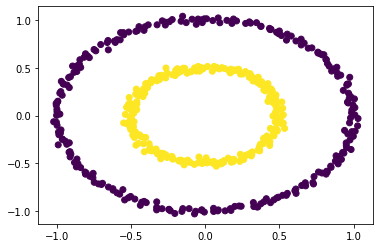

In [ ]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [ ]:
from sklearn import svm

вот тута мы можем поменять аргумент kernel на вот такие значения: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’}. Так же можно менять параметр nu

***KERNEL = LINEAR***

In [ ]:
clf = svm.NuSVC(kernel="linear", nu=0.5) 
clf.fit(X_train, y_train)

NuSVC(kernel='linear')

In [ ]:
xx, yy = np.meshgrid(np.linspace(-2, 2, 500), np.linspace(-2, 2, 500))

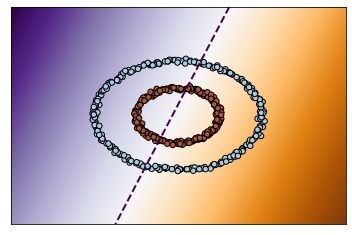

In [ ]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.xticks(())
plt.yticks(())
plt.axis([-2, 2, -2, 2])
plt.show()

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
tp_lr, tn_lr, fp_lr, fn_lr = compute_tp_tn_fn_fp(y_test, y_pred)

In [ ]:
print('Accuracy for SVM with linear kernel:', compute_accuracy(tp_lr, tn_lr, fn_lr, fp_lr))
print('Precision for SVM with linear kernel:', compute_precision(tp_lr, fp_lr))
print('Recall for SVM with linear kernel:', compute_recall(tp_lr, fn_lr))
print('F-1 for SVM with linear kernel:', compute_f1_score(tp_lr, tn_lr, fp_lr, fn_lr))

Accuracy for SVM with linear kernel: 0.5
Precision for SVM with linear kernel: 0.5294117647058824
Recall for SVM with linear kernel: 0.5094339622641509
F-1 for SVM with linear kernel: 0.5192307692307693


***KERNEL = POLY***

In [ ]:
clf = svm.NuSVC(kernel="poly", nu=0.5) 
clf.fit(X_train, y_train)

NuSVC(kernel='poly')

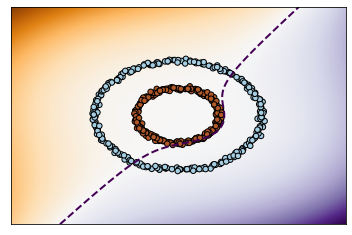

In [ ]:
xx, yy = np.meshgrid(np.linspace(-2, 2, 500), np.linspace(-2, 2, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.xticks(())
plt.yticks(())
plt.axis([-2, 2, -2, 2])
plt.show()

In [ ]:
y_pred=clf.predict(X_test)
tp_lr, tn_lr, fp_lr, fn_lr = compute_tp_tn_fn_fp(y_test, y_pred)
print('Accuracy for SVM with poly kernel:', compute_accuracy(tp_lr, tn_lr, fn_lr, fp_lr))
print('Precision for SVM with poly kernel:', compute_precision(tp_lr, fp_lr))
print('Recall for SVM with poly kernel:', compute_recall(tp_lr, fn_lr))
print('F-1 for SVM with poly kernel:', compute_f1_score(tp_lr, tn_lr, fp_lr, fn_lr))

Accuracy for SVM with poly kernel: 0.74
Precision for SVM with poly kernel: 0.68
Recall for SVM with poly kernel: 0.9622641509433962
F-1 for SVM with poly kernel: 0.796875


***KERNEL = RBF***

In [ ]:
clf = svm.NuSVC(kernel="rbf", nu=0.5) 
clf.fit(X_train, y_train)

NuSVC()

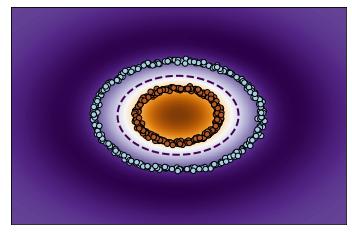

In [ ]:
xx, yy = np.meshgrid(np.linspace(-2, 2, 500), np.linspace(-2, 2, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.xticks(())
plt.yticks(())
plt.axis([-2, 2, -2, 2])
plt.show()

In [ ]:
y_pred=clf.predict(X_test)
tp_lr, tn_lr, fp_lr, fn_lr = compute_tp_tn_fn_fp(y_test, y_pred)
print('Accuracy for SVM with poly kernel:', compute_accuracy(tp_lr, tn_lr, fn_lr, fp_lr))
print('Precision for SVM with poly kernel:', compute_precision(tp_lr, fp_lr))
print('Recall for SVM with poly kernel:', compute_recall(tp_lr, fn_lr))
print('F-1 for SVM with poly kernel:', compute_f1_score(tp_lr, tn_lr, fp_lr, fn_lr))

Accuracy for SVM with poly kernel: 1.0
Precision for SVM with poly kernel: 1.0
Recall for SVM with poly kernel: 1.0
F-1 for SVM with poly kernel: 1.0


***KERNEL = SIGMOID***

In [ ]:
clf = svm.NuSVC(kernel="sigmoid", nu=0.5) 
clf.fit(X_train, y_train)

NuSVC(kernel='sigmoid')

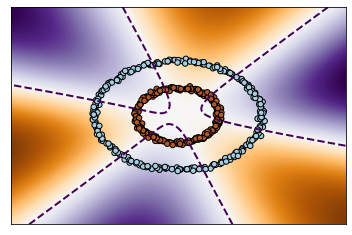

In [ ]:
xx, yy = np.meshgrid(np.linspace(-2, 2, 500), np.linspace(-2, 2, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.xticks(())
plt.yticks(())
plt.axis([-2, 2, -2, 2])
plt.show()

In [ ]:
y_pred=clf.predict(X_test)
tp_lr, tn_lr, fp_lr, fn_lr = compute_tp_tn_fn_fp(y_test, y_pred)
print('Accuracy for SVM with poly kernel:', compute_accuracy(tp_lr, tn_lr, fn_lr, fp_lr))
print('Precision for SVM with poly kernel:', compute_precision(tp_lr, fp_lr))
print('Recall for SVM with poly kernel:', compute_recall(tp_lr, fn_lr))
print('F-1 for SVM with poly kernel:', compute_f1_score(tp_lr, tn_lr, fp_lr, fn_lr))

Accuracy for SVM with poly kernel: 0.52
Precision for SVM with poly kernel: 0.5454545454545454
Recall for SVM with poly kernel: 0.5660377358490566
F-1 for SVM with poly kernel: 0.5555555555555556


ИТОГО ПОЛУЧАЕТСЯ, ЧТО В НАШЕМ КОНКУРСЕ ЯДЕР ПОБЕЖДАЕТ RBF. ПОЗДРАВЛЯЕМ ГАУССОВО ЯДРО!

ЗАВИСИМОСТЬ РЕЗУЛЬТАТОВ ОТ НЮ:


In [ ]:
X, Y=make_circles(n_samples=100, noise=0.02, factor=0.5)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

clf = svm.NuSVC(kernel="rbf") 
clf.fit(X_train, y_train)

NuSVC()

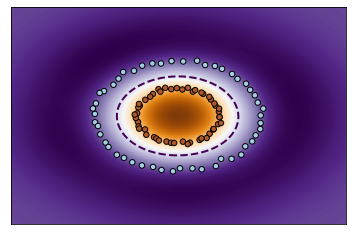

In [ ]:
xx, yy = np.meshgrid(np.linspace(-2, 2, 500), np.linspace(-2, 2, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.xticks(())
plt.yticks(())
plt.axis([-2, 2, -2, 2])
plt.show()

In [ ]:
y_pred=clf.predict(X_test)
tp_lr, tn_lr, fp_lr, fn_lr = compute_tp_tn_fn_fp(y_test, y_pred)
print('Accuracy for SVM with poly kernel:', compute_accuracy(tp_lr, tn_lr, fn_lr, fp_lr))
print('Precision for SVM with poly kernel:', compute_precision(tp_lr, fp_lr))
print('Recall for SVM with poly kernel:', compute_recall(tp_lr, fn_lr))
print('F-1 for SVM with poly kernel:', compute_f1_score(tp_lr, tn_lr, fp_lr, fn_lr))

Accuracy for SVM with poly kernel: 1.0
Precision for SVM with poly kernel: 1.0
Recall for SVM with poly kernel: 1.0
F-1 for SVM with poly kernel: 1.0


In [ ]:
X, Y=make_circles(n_samples=500, noise=0.02, factor=0.5)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

clf = svm.NuSVC(kernel="rbf") 
clf.fit(X_train, y_train)
clf = svm.NuSVC(kernel="rbf") 
clf.fit(X_train, y_train)

NuSVC()

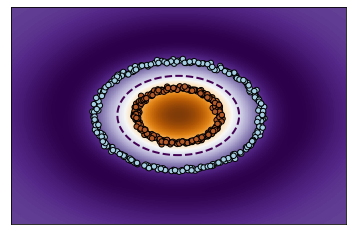

In [ ]:
xx, yy = np.meshgrid(np.linspace(-2, 2, 500), np.linspace(-2, 2, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.xticks(())
plt.yticks(())
plt.axis([-2, 2, -2, 2])
plt.show()

In [ ]:
y_pred=clf.predict(X_test)
tp_lr, tn_lr, fp_lr, fn_lr = compute_tp_tn_fn_fp(y_test, y_pred)
print('Accuracy for SVM with poly kernel:', compute_accuracy(tp_lr, tn_lr, fn_lr, fp_lr))
print('Precision for SVM with poly kernel:', compute_precision(tp_lr, fp_lr))
print('Recall for SVM with poly kernel:', compute_recall(tp_lr, fn_lr))
print('F-1 for SVM with poly kernel:', compute_f1_score(tp_lr, tn_lr, fp_lr, fn_lr))

Accuracy for SVM with poly kernel: 1.0
Precision for SVM with poly kernel: 1.0
Recall for SVM with poly kernel: 1.0
F-1 for SVM with poly kernel: 1.0


In [ ]:
X, Y=make_circles(n_samples=1500, noise=0.02, factor=0.5)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

clf = svm.NuSVC(kernel="rbf") 
clf.fit(X_train, y_train)
clf = svm.NuSVC(kernel="rbf") 
clf.fit(X_train, y_train)

NuSVC()

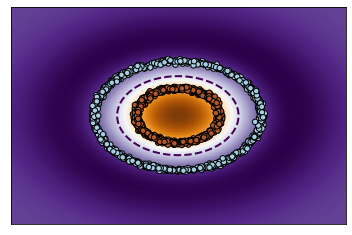

In [ ]:
xx, yy = np.meshgrid(np.linspace(-2, 2, 500), np.linspace(-2, 2, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.xticks(())
plt.yticks(())
plt.axis([-2, 2, -2, 2])
plt.show()

In [ ]:
y_pred=clf.predict(X_test)
tp_lr, tn_lr, fp_lr, fn_lr = compute_tp_tn_fn_fp(y_test, y_pred)
print('Accuracy for SVM with poly kernel:', compute_accuracy(tp_lr, tn_lr, fn_lr, fp_lr))
print('Precision for SVM with poly kernel:', compute_precision(tp_lr, fp_lr))
print('Recall for SVM with poly kernel:', compute_recall(tp_lr, fn_lr))
print('F-1 for SVM with poly kernel:', compute_f1_score(tp_lr, tn_lr, fp_lr, fn_lr))

Accuracy for SVM with poly kernel: 1.0
Precision for SVM with poly kernel: 1.0
Recall for SVM with poly kernel: 1.0
F-1 for SVM with poly kernel: 1.0


In [ ]:
X, Y=make_circles(n_samples=10000, noise=0.02, factor=0.5)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

clf = svm.NuSVC(kernel="rbf") 
clf.fit(X_train, y_train)
clf = svm.NuSVC(kernel="rbf") 
clf.fit(X_train, y_train)

NuSVC()

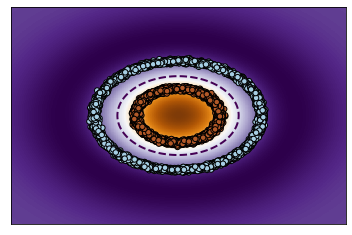

In [ ]:
xx, yy = np.meshgrid(np.linspace(-2, 2, 500), np.linspace(-2, 2, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.xticks(())
plt.yticks(())
plt.axis([-2, 2, -2, 2])
plt.show()

In [ ]:
y_pred=clf.predict(X_test)
tp_lr, tn_lr, fp_lr, fn_lr = compute_tp_tn_fn_fp(y_test, y_pred)
print('Accuracy for SVM with poly kernel:', compute_accuracy(tp_lr, tn_lr, fn_lr, fp_lr))
print('Precision for SVM with poly kernel:', compute_precision(tp_lr, fp_lr))
print('Recall for SVM with poly kernel:', compute_recall(tp_lr, fn_lr))
print('F-1 for SVM with poly kernel:', compute_f1_score(tp_lr, tn_lr, fp_lr, fn_lr))

Accuracy for SVM with poly kernel: 1.0
Precision for SVM with poly kernel: 1.0
Recall for SVM with poly kernel: 1.0
F-1 for SVM with poly kernel: 1.0


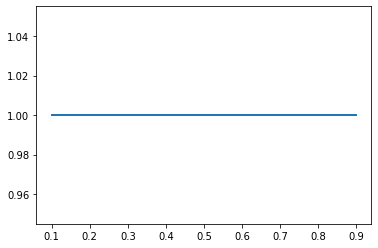

In [ ]:
x = [0.1, 0.3, 0.6, 0.9]
y = [1, 1, 1, 1]
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

plt.show()